# ECOLE 42 QISKit Hello Quantum World!

Jean-Michel Torres 2019-04-09, IBM Q Hub France

Content under Apache Licence version 2

Star & Download from: https://github.com/jmit34/20190410

### Content:
<ol>
    <li>Quantum Experience: composer overview</li>
    <li>No QISKit: Algo Complexity</li>
    <li>QISKit: single qubit</li>
    <li>QISKit: multi-qbit gates</li>
    <li>Qubits quantum states</li>
    <li>Quantum emoticon</li>
    <li>more quantum computing</li>
</ol>


# 1. Quantum Experience: composer demo

https://www.research.ibm.com/ibm-q/

# 2. No QISKit: Algo Complexity

### Loop, test, and Monte-Carlo

In [1]:
import time
from random import random
start_time = time.time()

#---> calculation starts here
iterations = 5_000_000                  # change this for accuracy vs duration 
hit = 0                                 # counter of random hits with module < 1 
for i in range(iterations):
    if random()**2 + random()**2 < 1:   # random(a,b) returns a pseudo random float
        hit += 1                        # between a & b. Default : between 0 and 1 
#---> calulation ends here

end_time = time.time()
duration = end_time - start_time

print(f"Total execution time: {duration:.1f} seconds")
print(f"estimation of PI = {4 * hit / iterations}")

Total execution time: 2.3 seconds
estimation of PI = 3.1414552


## Computing can become huge

Sit 5 people around a table:
<ul><li>5 choices for the first one (unless the rotation does not count),</li>
    <li>4 choices for the second,</li>
    <li>3 for the third... :</li></ul>
5 x 4 x 3 x 2 x 1 = 5! = 120 

Sit 10 people : 10! = 3 628 800 possibilities

Sitting 100 people: 

In [2]:
def factorial(n):
    if n<2:
        return 1
    else:
        return n*factorial(n-1)
 
print(factorial(100))

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


is this "big" ? ... see how fast the following function grows : 

\begin{equation}
x \uparrow \uparrow x
\end{equation}

also noted : $\ {x}^{x^{x}} $

In [3]:
'''
See how fast this function grows... 
try this with a = 2, 3, 4, 5... maybe up to 7
8 or more will be very long
'''
a = 2
print(a**a**a)

16


### finding the factors of a large integer

In [4]:
import time
from math import sqrt,floor

start_time = time.time()
# choose one (depending on your ratio patience/CPU)
d =         6721502531819 #(~0.4 sec)  (13)
#d =    40355369611024687 #(~30 sec)   (17)
#d = 70552560783426882343 #(~2100 sec) (20)

maxCalc = floor(sqrt(d))

for i in range(2,maxCalc):
    if d % i == 0:
        print(i)
        break

end_time = time.time()
duration = end_time - start_time
print(f"Total execution time: {duration:.3f} seconds")
print(f"Loops per second {i / duration:.0f}")

1453033
Total execution time: 0.305 seconds
Loops per second 4761168


# Try it ! 

### Deep dive into an example : sorting data. 

<ul><li>a. Let's build a small duration mesurement and plotting tool</li>
    <li>b. Try a naive sort algorithm and try to determine computational complexity.</li> 
    <li>c. Then use the QICKSORT algorithm.</li>
    <li>d. How does pyton sort() compares ?</li>
</ul>


a. Duration plotting tool

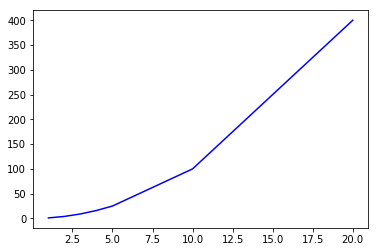

In [6]:
import matplotlib.pyplot as plt

# this will be our array of problem size
x = [1,2,3,4,5,10,20]

# this will be the run duration
y = [1,4,9,16,25,100,400]

plt.plot(x,y,color="blue")

b. Now lets build a naive sorting algo: "bubble sort"

In [9]:
import random

# define a swap function : input : array, index1, index2, 
# returns array with values at index1 and index2 swapped
def swap(arr, i1, i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

# define n : the size of your array
n = 10
# define an array of n random numbers
arr = [random.random() for i in range(n)]
print(arr)

# run n time through the array, and if the next item value is smaller than the 
# current item value : swap those items in the array. (ascending sort)

for i in range(n):
    for j in range(n-1):
        if arr[j+1] < arr[j]:
            swap(arr,j+1,j)
print(arr)

[0.31501152643879915, 0.5036549748170449, 0.16053630960649323, 0.4203875258405103, 0.1009596468417221, 0.6383045065510196, 0.8857224323663669, 0.508465448902028, 0.3586863931730059, 0.3114221270059837]
[0.1009596468417221, 0.16053630960649323, 0.3114221270059837, 0.31501152643879915, 0.3586863931730059, 0.4203875258405103, 0.5036549748170449, 0.508465448902028, 0.6383045065510196, 0.8857224323663669]


Reuse the bubble sort algo, implementing an exectution timer: 
Use time() function in time library to determine starting time (after the array is loaded) and ending time (after sort is done).

In [13]:
import random
import time

def swap(arr,i1,i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

n= 2000
arr = [random.random() for i in range(n)]
start_time = time.time()

for i in range(n):
    for j in range(n-1):
        if arr[j+1] < arr[j]:
            swap(arr,j+1,j)
end_time = time.time()

duration = end_time - start_time
print(duration)

1.2308409214019775


Now build the function that inputs a size and returns the execution time for the bubble-sort. 

In [14]:
import random
import time

def swap(arr,i1,i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

def get_bubble_sort_time(n):
    arr = [random.random() for i in range(n)]
    start_time = time.time()

    for i in range(n):
        for j in range(n-1):
            if arr[j+1] < arr[j]:
                swap(arr,j+1,j)
    end_time = time.time()
    return  end_time - start_time

print(get_bubble_sort_time(3000))

1.9233450889587402


Call this function from a list of sizes, build a list of durations, plot

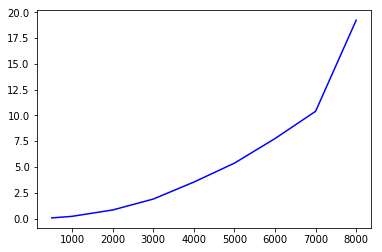

In [15]:
import random
import time
import matplotlib.pyplot as plt

def swap(arr,i1,i2):
    t = arr[i1]
    arr[i1] = arr[i2]
    arr[i2] = t

def get_bubble_sort_time(n):
    arr = [random.random() for i in range(n)]
    start_time = time.time()
    for i in range(n):
        for j in range(n-1):
            if arr[j+1] < arr[j]:
                swap(arr,j+1,j)
    end_time = time.time()
    return  end_time - start_time

times = []
sizes = [500,1000,2000,3000,4000,5000,6000,7000,8000]
for n in sizes: 
    times.append(get_bubble_sort_time(n))

plt.plot(sizes,times,color="blue")

c. Now to the QUICKSORT (ref. Youtube/"The Coding Train" April 4 2019)

Quicksort was described by Tony Hoare in 1961. It is a recursive algorithm: 
<ol>
    <li>The recursive function applies to one slice of the array to be sorted.</li>
    <li>First call is on the whole array (from index 0 to array length)</li>
    <li>the function has inputs: array, and 2 indexes (smaller or equal to array length)</li>
    <li> while the 2 indexes are not equal, the function calculates a "pivot_index" and will then call itself twice : once for the sub-array at the left of the pivotindenx, and once for the subarray at the right</li>
    <li> to calculate a pivotindex on the array (or a subarray):<ul>
    <li> we move to the left part all values lower than pivotvalue (value of the last item (arbitrary choice to choose the last item) and leave the values greater the pivotvalue to it's right</li></ul>
    </li></ol>

In [16]:
import random

def swap(arr,i,j):
    ### swaps i and j values in array a
    t = arr[i]
    arr[i] = arr[j]
    arr[j] = t 
    
def quicksort(arr, start, end):
    if start >= end:
        # done
        return
    # calculate pivot index with the partition function
    index = partition(arr, start, end)
    # call quicksort for both sides of the pivot index. 
    # left part
    quicksort(arr,start,index - 1)
    # right part
    quicksort(arr,index + 1, end)

def partition(arr,s,e):
    # initialize pivot index to the left
    pivotindex = s
    # initialize pivot value to the value of the rightmost element
    pivotvalue = arr[e]
    # for all elements if their value is lower than pivot value
    # put the value to the current pivotindex (left at beginning, and increment pivotindex)
    # when this is done put the pivotvalue at the pivotindex position
    # return that position so we can have the next iteration on left 
    # and right parts relative to the pivotindex. 
    for i in range (s,e):
        if arr[i] < pivotvalue:
            swap(arr,i,pivotindex)
            pivotindex +=1
    swap(arr,pivotindex,e)
    return pivotindex

size = 500_000
arr = [random.random() for i in range(size)]
size = len(arr)
start_time = time.time()

quicksort(arr, 0, size-1 )


end_time = time.time()
duration = end_time - start_time

print(f"Total execution time: {duration:.1f} seconds")

Total execution time: 3.5 seconds


call the quicksort with a list of sizes, build a list of durations, plot

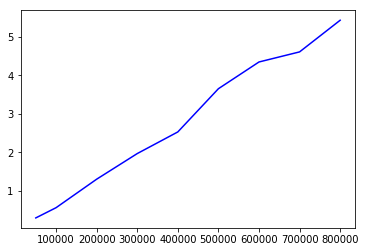

In [17]:
import random
import time
import matplotlib.pyplot as plt

def swap(arr,i,j):
    ### swaps i and j values in array a
    t = arr[i]
    arr[i] = arr[j]
    arr[j] = t 
    
def quicksort(arr, start, end):
    if start >= end:
        # done
        return
    # calculate pivot index with the partition function
    index = partition(arr, start, end)
    # call quicksort for both sides of the pivot index. 
    # left part
    quicksort(arr,start,index - 1)
    # right part
    quicksort(arr,index + 1, end)

def partition(arr,s,e):
    # initialize pivot index to the left
    pivotindex = s
    # initialize pivot value to the value of the rightmost element
    pivotvalue = arr[e]
    # for all elements if their value is lower than pivot value
    # put the value to the current pivotindex (left at beginning, and increment pivotindex)
    # when this is done put the pivotvalue at the pivotindex position
    # return that position so we can have the next iteration on left 
    # and right parts relative to the pivotindex. 
    for i in range (s,e):
        if arr[i] < pivotvalue:
            swap(arr,i,pivotindex)
            pivotindex +=1
    swap(arr,pivotindex,e)
    return pivotindex

def get_quicksort_time(n):
    arr = [random.random() for i in range(n)]
    start_time = time.time()
    quicksort(arr,0,n-1)
    end_time = time.time()
    return  end_time - start_time

times = []
sizes = [50000,100000,200000,300000,400000,500000,600000,700000,800000]
for n in sizes: 
    times.append(get_quicksort_time(n))

plt.plot(sizes,times,color="blue")

Finally, see what the Python included sort() function does 

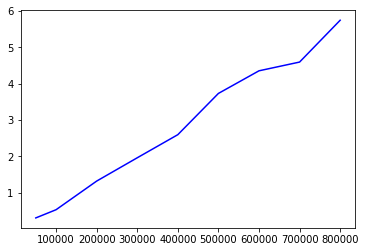

In [18]:
import random
import time
import matplotlib.pyplot as plt

def get_python_sort_time(n):
    arr = [random.random() for i in range(n)]
    start_time = time.time()
    arr.sort()
    end_time = time.time()
    return  end_time - start_time

times = []
sizes = [50000,100000,200000,300000,400000,500000,600000,700000,800000]
for n in sizes: 
    times.append(get_quicksort_time(n))

plt.plot(sizes,times,color="blue")

# 3. QISKit: single qubit.

## <span style="color:red"><em>The structure of a quantum program using single "bit-flip": NOT (aka X-gate)</em></span>

#### imports
you need to import from qiskit : 
<ul>
    <li>QuantumRegister : to define and use qubits</li>
    <li>ClassicalRegister : to get a "classical" measurement of the qubits after computation has happened</li>
    <li>QuantumCircuit to be able to compose your calculation</li>
    <li>execute : this will be used to actually "run" your circuit</li>
</ul>    


In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

#### define needed registers and build quantum circuit
for example let's define `qr` as a quantum register of size 1 (will use 1 qubit)

`<register_name> = QuantumRegister(size)` 

and let's define `cr` as a classical register with that same size. Siminal notation use ClassicalRegister constructor


In [20]:
# define registers here, size 1
cr = ClassicalRegister(1)
qr = QuantumRegister(1)

Let's define a quantum circuit using `qc` and `cr`

`<circuit> = QuantumCircuit(<quantum_register>, <classical_register>)`


In [21]:
# define quantum  circuit here 
my_circuit = QuantumCircuit(qr,cr)

Then you can add a gate (in this case NOT is noted `x` gate: reverse 0 to 1 and 1 to 0, this way: 

`<circuit>.gate(<qubits>)`

where `<circuit>` is the circuit object you have created above, and `<qubits>`is the list of qubit on which the gate applies `qr[0]` in this case.


In [22]:
# add identity gate here 
my_circuit.x(qr[0])

Add another gate to your circuit, this one is special : it comes at the end and uses `qr` and `cr`

`<circuit>.measure(<qr,cr>)`    

this will measure the states of the qubits in the quantum register, and load values into the classical register.

In [23]:
# add measurement gate here 
my_circuit.measure(qr,cr)

You can now visualize the circuit using the .draw() method on your circuit : `<circuit>.draw()`
 

In [24]:
# use draw method: 
my_circuit.draw()

### prepare for execution

Here we select on which device actual machine or simulator we will run our experiment
Here we select the local simulator.

In [25]:
from qiskit import Aer
print(Aer.backends())
backend = Aer.get_backend('qasm_simulator')

[<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]


### execute, and read results

Now we execute our experiment using the `execute` function, returning a "job result" object:

`execute()` uses these parameters: 
<ul>
    <li>circuit object</li>
    <li>the device on which we execute (in our example this is stored in `backend`)</li>
    <li>the number of "shots" we want to run, eg: `shots=1024`</li>
</ul>  

It goes: 

`<myjob> = execute(<my_circuit>,<backend>,shots=nnnn)` 

Then we store the result in a variable `<my_result>` using `.result()` method on the job

Finally, we can print `<my_result>.get_counts(<my_circuit>)`


In [26]:
# define job, get results
job = execute(my_circuit,backend,shots=1024)
my_result = job.result()
print(my_result.get_counts(my_circuit))  

{'1': 1024}


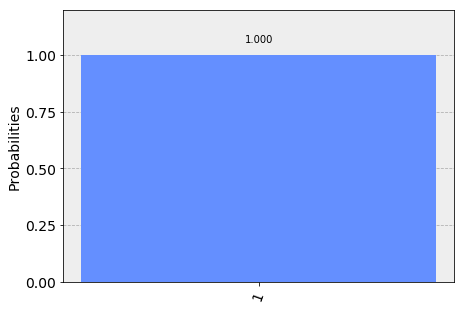

In [27]:
# plot results
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_result.get_counts(my_circuit))

# 4. QISKit: multi-qbit gates

## <span style="color:red"><em>4.1 CNOT controlled not </em></span>

### flips state of qbit b if qbit a is 1 (else leave b in original state).
<img src="./images/CNOT.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

The cnot gate is : `cx(<ctrl_qubit,target_qubit)`

Don't forget to define quantum and classical registers with size 2. 
The build a quantum circuit. You can use `x` gate on qbit0 to experiment the cnot effect. 

In [28]:
# define registers, size 2
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [36]:
# define circuit
qc_cnot = QuantumCircuit(qr,cr)

# add x on qubit0 (or not)


# add cnot controlled bit qbit0, target qubit1
qc_cnot.cx(qr[0],qr[1])
# add measure
qc_cnot.measure(qr,cr)
# add draw
qc_cnot.draw()

In [37]:
# execute, get results 
job = execute(qc_cnot,backend, shots=10)
result = job.result()
result.get_counts(qc_cnot)

{'000': 10}

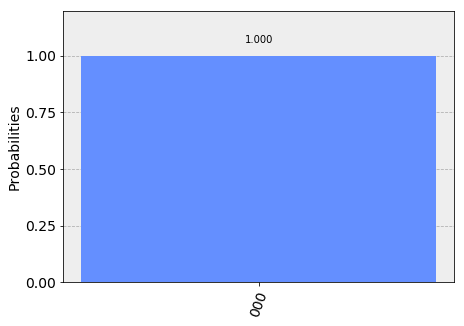

In [38]:
# change the value in get_count method (your circuit name)
plot_histogram(result.get_counts(qc_cnot))

## <span style="color:red"><em>4.2 CONTROL-CONTROL-NOT Toffoli gate</em></span>

### if a = 1 and b = 1, then flip c
<img src="./images/Toffoli.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

control-control-not syntax : 

`<circuit>.ccnot(control_qubitA, control_qubitB, taget_qubit)`

In [39]:
# define registers, size 3
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

In [42]:
# define quantum circuit

qc_ccnot = QuantumCircuit(qr,cr)

# add x on qubit0 and/or qubit 1 to view different results 


# add ccnot, measure, draw 
qc_ccnot.ccx(qr[0],qr[1],qr[2])
qc_ccnot.measure(qr,cr)
qc_ccnot.draw()

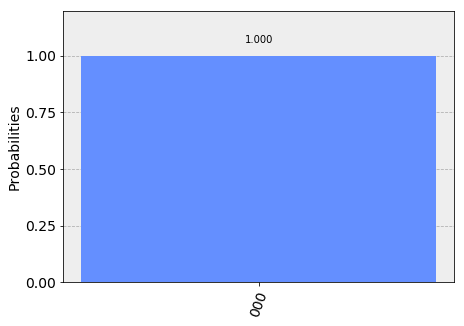

In [43]:
# execute, get results, plot
job = execute(qc_ccnot,backend, shots=1024)
result = job.result()
result.get_counts(qc_ccnot)
plot_histogram(result.get_counts(qc_ccnot))

## <span style="color:red"><em>4.3 CONTROL-SWAP : Fredkin gate</em></span>


### if a = 1 then swap b and c states.
<img src="./images/Fredkin.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">
Notes: 
 
<ol>
    <li><span style="color:green"><em>Fredkin gate is universal</em></span></li>
    <li><span style="color:green"><em>Quantum gates are reversible.</em></span></li>
</ol>
    

control-swap syntax: 

`<circuit>.cswap(control_qubit, swapped_qubit, swapped_qubit)`

In [44]:
# define registers, circuit, add X on qubit 0, and/or 1, and/or 2 to view differentt cases: 

qc_cswap = QuantumCircuit(qr,cr)
qc_cswap.x(qr[0])
qc_cswap.x(qr[1])

#add cswap

qc_cswap.cswap(qr[0],qr[1],qr[2])

#add measure and draw

qc_cswap.measure(qr,cr)
qc_cswap.draw()

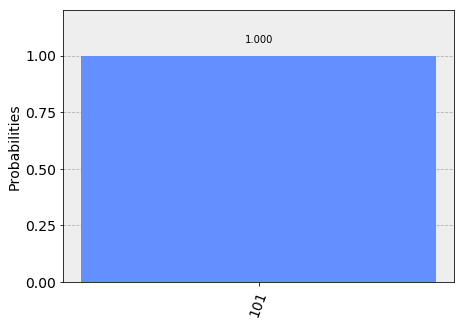

In [45]:
# execute, get results, plot...

job = execute(qc_cswap,backend, shots=1024)
result = job.result()
result.get_counts(qc_cswap)
plot_histogram(result.get_counts(qc_cswap))

## <span style="color:red"><em>4.4 What does this do ?</em></span>

This is a basic 2 qubits gate, can you figure out what this does ? 

In [46]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
mystery = QuantumCircuit(qr,cr)
###########################
mystery.cx(qr[0],qr[1])
mystery.cx(qr[1],qr[0])
mystery.cx(qr[0],qr[1])
mystery.measure(qr,cr)
###########################
mystery.draw()

.... Hint, try this (will run the above circuit against all input combinations 00,01,10,11 and will show you the result): 

In [47]:
print("       q0 q1")
print("       -- --")
for i in range(4): 
    qc = QuantumCircuit(qr,cr)
    if i%2: 
        qc.x(qr[0])
    if i>1:
        qc.x(qr[1])
    # this is the same circuit as above #
    qc.cx(qr[0],qr[1])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[0],qr[1])
    qc.measure(qr,cr)
    #####################################
    print(f"input:  {(i>1)*1} {i%2}")
    job = execute(qc,backend, shots=1024)
    result = job.result()
    for x in (result.get_counts(qc)):
        print(f"output: {x[0]} {x[1]}")
    print(" ")

       q0 q1
       -- --
input:  0 0
output: 0 0
 
input:  0 1
output: 1 0
 
input:  1 0
output: 0 1
 
input:  1 1
output: 1 1
 


# 5. Qubits quantum states

##  <span style="color:red"><em>5.1 Single qbit : "superpositon"</em></span>

Let's do it again : define registers (size 1), quantum circuit, add `h` gate, and `measure` gate, draw circuit. 

In [48]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
qc_sup.draw()

execute and get results

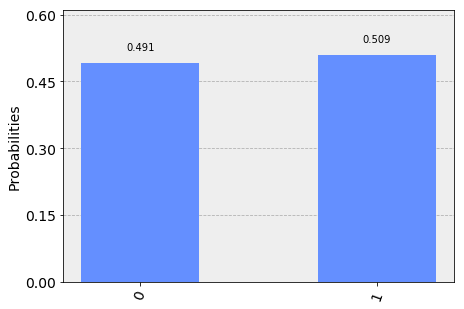

In [49]:
job = execute(qc_sup,backend, shots=8096)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

<img src="./images/h_bloch2.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

### See this page for more on what happens on the "Bloch Sphere" when using this and other quantum gates : https://javafxpert.github.io/grok-bloch/

#### More on moving in the Bloch-Sphere ?

In [50]:
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, execute


## Setting up:
#
num_qubits = 1
qr = QuantumRegister(num_qubits, "qr")
circ = QuantumCircuit(qr)


## Building the circuit:
#
circ.x( qr[0] )     # inverting the first and only qubit

## Printing the circuit:
#
print( circ.draw().single_string() )
print(" ")

## Setting up the statevector simulator:
#
simulator = BasicAer.get_backend('statevector_simulator')

## Running the simulator with the circuit on different input states:
#
input_state_zero    = [1, 0]                        # state |0>     or Z+
input_state_one     = [0, 1]                        # state |1>     or Z-
input_state_plus    = [1/sqrt(2),   1/sqrt(2) ]     # state |+>     or X+
input_state_minus   = [1/sqrt(2),  -1/sqrt(2) ]     # state |->     or X-
input_state_eye     = [1/sqrt(2),  1j/sqrt(2) ]     # state |i>     or Y+
input_state_mye     = [1/sqrt(2), -1j/sqrt(2) ]     # state |-i>    or Y-

for input_statevector in (input_state_zero, input_state_one, input_state_plus, input_state_minus, input_state_eye, input_state_mye):

    print( "Input statevector : {}".format(input_statevector) )
    output_statevector = list( execute(circ, simulator, backend_options={"initial_statevector": input_statevector}).result().get_statevector(circ) )
    print( "Output statevector: {}".format(output_statevector) )
    print("")


         ┌───┐
qr_0: |0>┤ X ├
         └───┘
 
Input statevector : [1, 0]
Output statevector: [0j, (1+0j)]

Input statevector : [0, 1]
Output statevector: [(1+0j), 0j]

Input statevector : [0.7071067811865475, 0.7071067811865475]
Output statevector: [(0.7071067811865475+0j), (0.7071067811865475+0j)]

Input statevector : [0.7071067811865475, -0.7071067811865475]
Output statevector: [(-0.7071067811865475+0j), (0.7071067811865475+0j)]

Input statevector : [0.7071067811865475, 0.7071067811865475j]
Output statevector: [0.7071067811865475j, (0.7071067811865475+0j)]

Input statevector : [0.7071067811865475, (-0-0.7071067811865475j)]
Output statevector: [-0.7071067811865475j, (0.7071067811865475+0j)]



##  <span style="color:red"><em>5.2 What is superposition exactly ?</em></span>

Now try to build a quantum circuit, using a single qubit, use H then H again, then measure...

In [51]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
qc_sup.draw()

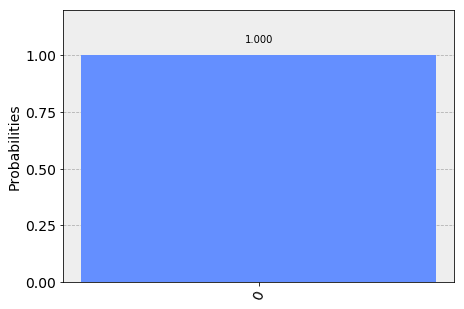

In [52]:
job = execute(qc_sup,backend, shots=1024)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

### Here is what happened ! (hope this helps :-) )
<br>
Let's define states |0⟩, |1⟩ as unitary basis vectors in a two dimensional space, we can write them in this form: 

\begin{equation}
|0⟩ = 
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\hspace{1cm}
|1⟩ = 
\left(
\begin{array}{cc}
 0 \\
 1 \\
\end{array}
\right)
\hspace{1cm}
\end{equation}

Then we define H (Hadamard operator) with this matrix : 


\begin{equation}
H = \frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right)
\hspace{1cm}
\end{equation}


It is easy to verify that : 


\begin{equation}
H|0⟩ = \frac{1}{\sqrt{2}} 
\left(
\begin{array}{cc}
 1 \\
 1 \\
\end{array}
\right)
\end{equation}


and that : 


\begin{equation}
H|1⟩ = \frac{1}{\sqrt{2}} 
\left(
\begin{array}{cc}
 1 \\
 -1 \\
\end{array}
\right)
\end{equation}

also, if we multiply this result again by H, we will find : 
\begin{equation}
HH|0⟩ =
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\end{equation}

That is :

\begin{equation} 
HH|0⟩ = |0⟩
\end{equation}

Which makes sense because it is also easy to verify that : 

\begin{equation} 
H^2 = I
\end{equation}

where:

\begin{equation}
I = 
\left(
\begin{array}{cc}
 1 & 0 \\
 0 & 1 \\
\end{array}
\right)
\end{equation}

##  <span style="color:red"><em>5.3 Multi qbit entanglement</em></span>

Now build a quantum circuit using 2 qubits, start with H on qbit0 and then CNOT (q0 controlling q1): 

`<cicruit>.cx(qr[0],qr[1])`

In [53]:
#define registers, define curcuit, build circuit, draw.
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_bell = QuantumCircuit(qr,cr)
qc_bell.h(qr[0])
qc_bell.cx(qr[0],qr[1])
qc_bell.measure(qr,cr)
qc_bell.draw()

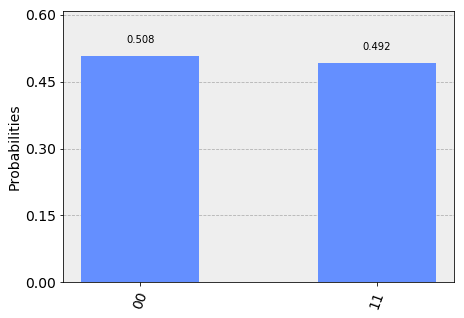

In [54]:
# define, execute job and plot results
job = execute(qc_bell,backend, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

### What does this mean ? ... 

This is called a Bell state and can be written as : 

\begin{equation} 
|Bell⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |11⟩ \right) 
\end{equation}

Let's assume we can factor it (find two states the product of which is the Bell state), for example: 

\begin{equation} 
|\phi⟩ = a|0⟩ + (b+ic)|1⟩  
\end{equation}
and 
\begin{equation} 
|\psi⟩ = d|0⟩ + (e+if)|1⟩  
\end{equation}

Then: 
\begin{equation} 
|\phi⟩|\psi⟩ = (ad|00⟩ + (ae + iaf)|01⟩ + (db+idc)|10⟩ + (b+ic)(e+if)|11⟩)  
\end{equation}

As |00⟩, |01⟩, |10⟩, |11⟩ are basis vectors, we can identify:  

\begin{equation}
ad = \frac{1}{\sqrt{2}}
\end{equation}
\begin{equation}
ae + iaf = 0
\end{equation}
\begin{equation}
db + idc = 0
\end{equation}
\begin{equation}
be - cf + i(bf+ce) = \frac{1}{\sqrt{2}}
\end{equation}

First a*d is not null so both a and d are not null. Second a complex number is equal to 0, then both is real and imaginary component are equal to 0. With a and d both not null, then e = f = b = c = 0, with that: be - cf = 0, but this does not work with : 
\begin{equation}
be - cf = \frac{1}{\sqrt{2}}
\end{equation}

Proving that the Bell state cannot be written as a product of single qubit states. 


### ... it means we cannot know anything about the separate components of the entangled system, we can only know about the whole.

##  <span style="color:red"><em>5.4 Bell state: running on actual quantum hardware</em></span>


In [58]:
# sign on to IBM Q Experience, get your API Token, write it in a file (eg Qconfig.py), in a line:  
# APItoken = '<your_API_token>

import Qconfig

print(Qconfig.APItoken)
#  now I can use Qconfig.APItoken to get the API key value 

94add97f029749a3f8bde07df2cb91bee02f620d896b22d022aefe37b7514ab920d70c23b59b306f49da00458e500573453ac887633bc2eda48feac10496e5e8


In [56]:
from qiskit import IBMQ
IBMQ.enable_account(Qconfig.APItoken)

In [57]:
my_back_end = IBMQ.get_backend('ibmq_5_tenerife')
my_back_end = IBMQ.get_backend('ibmq_16_melbourne')

In [59]:
print(my_back_end.status())

BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=8, status_msg='active')


In [60]:
job = execute(qc_bell,my_back_end, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

JobError: "HTTPSConnectionPool(host='quantumexperience.ng.bluemix.net', port=443): Max retries exceeded with url: /api/Jobs/5cad02a3b6888d0053b55348/status?access_token=1O501sjYJvZHd2EppiDMPAKMgJDzGs1JAimKyQx5Lgp6AqE3GCJP9uaLq4Bj2xqY (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11dca3ef0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"

##  <span style="color:red"><em>5.5 Swap</em></span>
### Swapping 2 qubits states on a real computer

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_swap = QuantumCircuit(qr,cr)
###########################
qc_swap.x(qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.cx(qr[1],qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.measure(qr,cr)
###########################
qc_swap.draw()

In [ ]:
job = execute(qc_swap,my_back_end, shots=1024)
result = job.result()
result.get_counts(qc_swap)
plot_histogram(result.get_counts(qc_swap))

##  <span style="color:red"><em>5.6 Bernstein-Vazirani : "oracle"</em></span>
### towards quantum computing

In [ ]:
q = QuantumRegister(4)
tmp = QuantumRegister(1)
res = ClassicalRegister(4)

In [ ]:
# secret = 1101
s = 13
oracle = QuantumCircuit(q,tmp,res)

In [ ]:
for i in range(len(q)):
    if ( s & (1 << i) ):
        oracle.cx(q[i],tmp[0])

In [ ]:
bv = QuantumCircuit(q,tmp,res)
bv.x(tmp[0])
bv.h(q)
bv.h(tmp)
bv += oracle
bv.h(q)
bv.h(tmp)
bv.measure(q,res)

In [ ]:
bv.draw()

In [ ]:
my_job = execute([bv], backend, shots=100)

In [ ]:
my_job = execute([bv], my_back_end, shots=8192)

In [46]:
result = my_job.result()
result.get_counts(bv)
print(result.get_counts(bv))
from qiskit.tools.visualization import plot_histogram
plot_histogram (result.get_counts(bv))

NameError: name 'my_job' is not defined

##  <span style="color:red"><em>5.7 More QISKit functions</em></span>

nombre de gates, largeur, nobre de circuits indépendants...



##  <span style="color:red"><em>6. quantum emoticon</em></span>

From qiskit tutorials (and get many more details and explanations there): 
https://github.com/Qiskit/qiskit-tutorials/blob/master/community/hello_world/quantum_emoticon.ipynb


In [ ]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ, BasicAer
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# set up registers and program
qr = QuantumRegister(14)
cr = ClassicalRegister(14)
qc = QuantumCircuit(qr, cr)

# rightmost seven (qu)bits have ')' = 0101001
qc.x(qr[0])
qc.x(qr[3])
qc.x(qr[5])

# second seven (qu)bits have superposition of
# '8' = 0111000
# ';' = 0111011
# these differ only on the rightmost two bits
qc.h(qr[8]) # create superposition on 9
qc.cx(qr[8],qr[7]) # spread it to 8 with a CNOT
qc.x(qr[10])
qc.x(qr[11])
qc.x(qr[12])

# measure
for j in range(14):
    qc.measure(qr[j], cr[j])

0.25	8)
0.75	;)


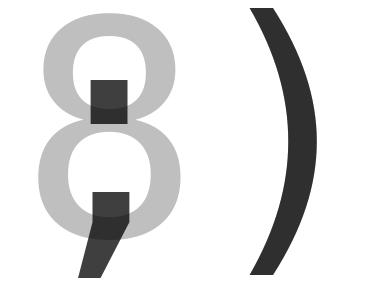

In [73]:
backend = BasicAer.get_backend('qasm_simulator')
shots_sim = 8

job_sim = execute(qc, backend, shots=shots_sim)
stats_sim = job_sim.result().get_counts()

#plot_histogram(stats_sim)

plt.rc('font', family='monospace')

def plot_smiley (stats, shots):
    for bitString in stats:
        char = chr(int( bitString[0:7] ,2)) # get string of the leftmost 7 bits and convert to an ASCII character
        char += chr(int( bitString[7:14] ,2)) # do the same for string of rightmost 7 bits, and add it to the previous character
        prob = stats[bitString] / shots # fraction of shots for which this result occurred
        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
        if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
            print(str(prob)+"\t"+char)
    plt.axis('off')
    plt.show()
    
plot_smiley(stats_sim, shots_sim)

# 7. More quantum computing

## <a href="https://www.research.ibm.com/ibm-q/">IBM Q informations, resources</a>

<img src="./images/IBMQ.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://qiskit.org/">QISKit : documentations, tutorials, GitHub</a>

<img src="./images/qiskitOrg.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">



## <a href="https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A">QISKit channel on Youtube</a>
<img src="./images/qiskitYoutube.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://fr.wikipedia.org/wiki/Calculateur_quantique">Wikipedia: Calculateur Quantique</a>
<img src="./images/QCWikipedia.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">

## Isaac Chuang & Peter Shor, Quantum Information Science I, Part 1
### Edx MOOC
<br>
<img src="./images/MOOCedX.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">
<br>

## Leonard Susskind, Art Freidman: Mécanique Quantique, Le minimum Théorique
### Presses polytechniques et universitaires romandes
<br>
<img src="./images/susskindFriedman.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## David McMahon, Quantum Computing Explained 
### Wiley
<br>
<img src="./images/mcmahon.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

### David Mermin, Calculs et Algorithmes Quantiques, 
#### EDP Sciences, CNRS Editions
<br>
<img src="./images/mermin.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Charles Corge, L'informatique Quantique, qu'est-ce et pour quoi faire ? 
### Ellipses
<br>
<img src="./images/corge.jpeg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Michael A. Nielsen and Isaac L. Chuang : Quantum Computation and Quantum Information
### Cambridge
<br>
<img src="./images/nielsenChuang.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>